In [99]:
import torch
import torchvision
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os

In [100]:
path = os.getcwd()+'\Joint_Dataset.csv'

In [101]:
dataset = pd.read_csv(path)
dataset_shuffle = shuffle(dataset)

In [102]:
X = dataset_shuffle.drop('label',axis=1)
y = dataset_shuffle['label']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
trainset = pd.concat([X_train,y_train],axis=1)
testset = pd.concat([X_test,y_test],axis=1)

In [105]:
class MSRDataset(Dataset):
    def __init__(self,data):
        self.len = data.shape[0]
        self.x_data = torch.from_numpy(data.drop('label',axis=1).to_numpy()).float()
        self.y_data = torch.from_numpy(data['label'].to_numpy()-1).type(torch.LongTensor)
    
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [106]:
train_data = MSRDataset(trainset)
test_data = MSRDataset(testset)

In [107]:
trainloader = DataLoader(dataset=train_data,batch_size=64,shuffle=True,num_workers=0)
testloader = DataLoader(dataset=test_data,batch_size=64,shuffle=True,num_workers=0)

In [119]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(60, 40)
        self.fc2 = nn.Linear(40, 40)
        self.fc3 = nn.Linear(40, 40)
        self.fc4 = nn.Linear(40,40)
        self.fc5 = nn.Linear(40,20)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x,dim=1)

In [120]:
net = Net()

In [121]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [123]:
import pdb
correct = 0
total = 0
loss_list = []
ite_list = []
for epoch in range(100):
    for i,data in enumerate(trainloader):
        inputs,labels = data
        inputs,labels = Variable(inputs),Variable(labels)
        optimizer.zero_grad()
        output = net(inputs)
        #pdb.set_trace()
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
    if epoch %10 == 0:
        loss_list.append(loss.data)
        ite_list.append(epoch)
        for idx,i in enumerate(output):
            if torch.argmax(i) == labels[idx]:
                correct+=1
            total+=1
        print('Accuracy on trainset epoch',epoch,':',round(correct/total,3)*100)
        

Accuracy on trainset epoch 0 : 4.9
Accuracy on trainset epoch 10 : 18.3
Accuracy on trainset epoch 20 : 25.2
Accuracy on trainset epoch 30 : 28.000000000000004
Accuracy on trainset epoch 40 : 31.7
Accuracy on trainset epoch 50 : 34.1
Accuracy on trainset epoch 60 : 36.6
Accuracy on trainset epoch 70 : 37.5
Accuracy on trainset epoch 80 : 37.1
Accuracy on trainset epoch 90 : 39.300000000000004


In [124]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs,labels = data
        inputs,labels = Variable(inputs),Variable(labels)
        #pdb.set_trace()
        output = net(inputs)
        for idx, i in enumerate(output):
            #pdb.set_trace()
            if torch.argmax(i) == labels[idx]:
                correct+=1
            total+=1
#pdb.set_trace()
print('Accuracy ', round(correct/total,3)*100)

Accuracy  51.7


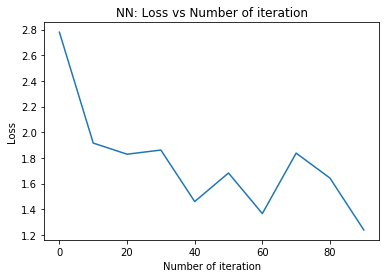

In [125]:
# visualization loss 
plt.plot(ite_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NN: Loss vs Number of iteration")
plt.show()